$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, ConvLSTM1D, Rescaling, Reshape, Flatten
from tensorflow.keras.datasets import mnist

# `+` Seed Value

In [3]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Split training data into training and validation sets
split_index = int(0.8 * len(X_train))
X_train, x_val = X_train[:split_index], X_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

## `+` Set Global Parameters

In [6]:
BATCH_SIZE  = 64
EPOCHS      = 50

## `i` Model Design

In [7]:
inputs = Input((28,28))
x = Rescaling(scale=1/255.)(inputs)
x = LSTM(32,recurrent_dropout=0.15)(x)
outputs=Dense(10,'softmax')(x)
model = keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8138 (31.79 KB)
Trainable params: 8138 (31.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## `ii` Model Compilation & Training

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
callback = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/50
750/750 [==============================] - 34s 40ms/step - loss: 0.9791 - accuracy: 0.6843 - val_loss: 0.4180 - val_accuracy: 0.8751
Epoch 2/50
750/750 [==============================] - 24s 32ms/step - loss: 0.3687 - accuracy: 0.8913 - val_loss: 0.2318 - val_accuracy: 0.9323
Epoch 3/50
750/750 [==============================] - 26s 34ms/step - loss: 0.2563 - accuracy: 0.9242 - val_loss: 0.1715 - val_accuracy: 0.9504
Epoch 4/50
750/750 [==============================] - 21s 28ms/step - loss: 0.2080 - accuracy: 0.9388 - val_loss: 0.1456 - val_accuracy: 0.9588
Epoch 5/50
750/750 [==============================] - 22s 30ms/step - loss: 0.1778 - accuracy: 0.9465 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 6/50
750/750 [==============================] - 20s 26ms/step - loss: 0.1539 - accuracy: 0.9542 - val_loss: 0.1181 - val_accuracy: 0.9660
Epoch 7/50
750/750 [==============================] - 18s 24ms/step - loss: 0.1361 - accuracy: 0.9593 - val_loss: 0.1049 - val_accuracy:

## `iii` Model Evaluation

In [10]:
train_evaluation = model.evaluate(X_train,y_train)
print("Train Evaluation Loss: {:.2f}%".format(train_evaluation[0]*100))
print("Train Evaluation Accuracy: {:.2f}%".format(train_evaluation[1]*100))

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0150 - accuracy: 0.9958
Train Evaluation Loss: 1.50%
Train Evaluation Accuracy: 99.58%


In [11]:
val_evaluation = model.evaluate(x_val,y_val)
print("Validation Evaluation Loss: {:.2f}%".format(val_evaluation[0]*100))
print("validation Evaluation Accuracy: {:.2f}%".format(val_evaluation[1]*100))

375/375 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.9859
Validation Evaluation Loss: 5.10%
validation Evaluation Accuracy: 98.59%


In [12]:
test_evaluation = model.evaluate(X_test,y_test)
print("Test Evaluation Loss: {:.2f}%".format(test_evaluation[0]*100))
print("Test Evaluation Accuracy: {:.2f}%".format(test_evaluation[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0471 - accuracy: 0.9869
Test Evaluation Loss: 4.71%
Test Evaluation Accuracy: 98.69%


## `iv` Result Visualization

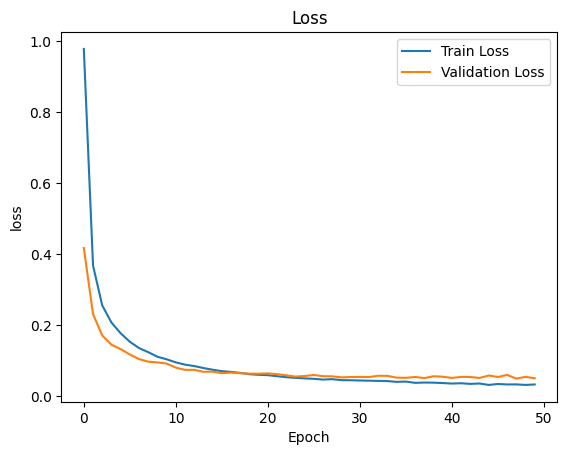

In [13]:
plt.plot(callback.history['loss'], label='Train Loss')
plt.plot(callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

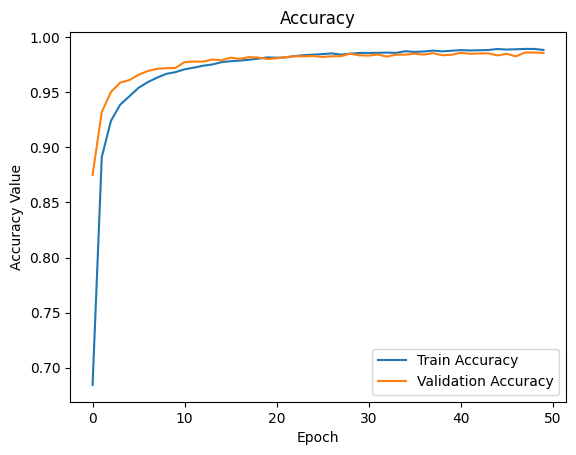

In [14]:
plt.plot(callback.history['accuracy'],label='Train Accuracy')
plt.plot(callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 [==============================] - 0s 119ms/step


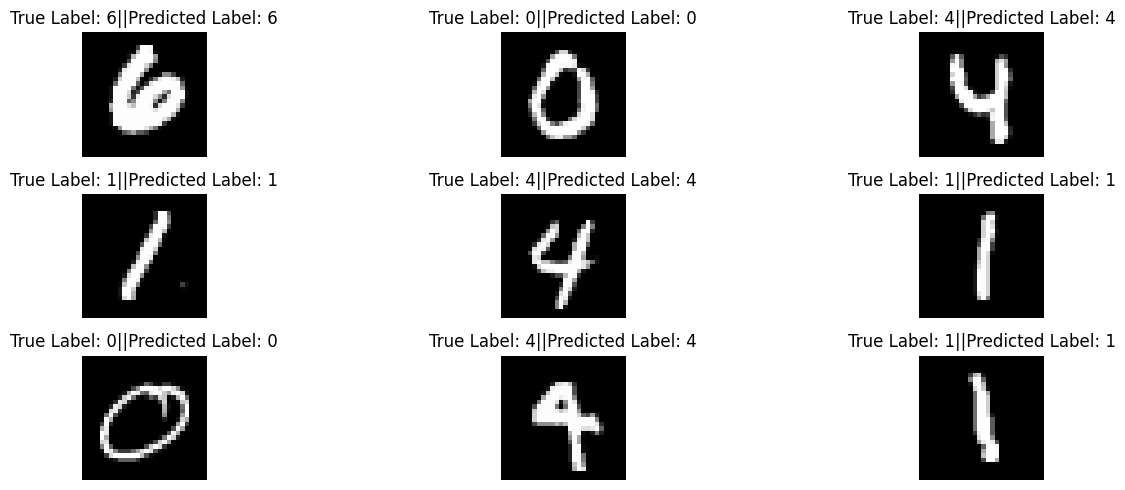

In [25]:
# Plot the Input, True Label, and Predicted Label
# Choose some test samples
num_samples = 9
samples_indices = np.random.choice(len(X_test), size=num_samples, replace=False)
samples = X_test[samples_indices]
true_labels = y_test[samples_indices]

# Predict the classes
predicted_labels = model.predict(samples)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Plot the samples with true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(3, 3,i+1)
    plt.imshow(samples[i], cmap='gray')
    plt.title("True Label: " + str(true_labels[i])+"||"+"Predicted Label: " + str(predicted_labels[i]))
    plt.axis('off')



plt.tight_layout()
plt.show()

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

Try adding a second LSTM layer before the dense layer(s)

In [35]:
inputs = keras.Input(shape=(28, 28))

# Rescale pixel values
x = Rescaling(scale=1/255)(inputs)

# First LSTM layer with recurrent dropout
x = LSTM(64, return_sequences=True, recurrent_dropout=0.15)(x)

# Second LSTM layer with recurrent dropout
x = LSTM(32, recurrent_dropout=0.15)(x)

# Output layer
outputs = Dense(10, activation='softmax')(x) #10 class classification

# Create the model
model2 = keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary
model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_8 (Rescaling)     (None, 28, 28)            0         
                                                                 
 lstm_13 (LSTM)              (None, 28, 64)            23808     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 36554 (142.79 KB)
Trainable params: 36554 (142.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
callback2 = model2.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 48s 59ms/step - loss: 0.6554 - accuracy: 0.7957 - val_loss: 0.2130 - val_accuracy: 0.9361
Epoch 2/20
750/750 [==============================] - 45s 59ms/step - loss: 0.2073 - accuracy: 0.9385 - val_loss: 0.1434 - val_accuracy: 0.9582
Epoch 3/20
750/750 [==============================] - 44s 58ms/step - loss: 0.1402 - accuracy: 0.9583 - val_loss: 0.1120 - val_accuracy: 0.9669
Epoch 4/20
750/750 [==============================] - 44s 59ms/step - loss: 0.1117 - accuracy: 0.9659 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 5/20
750/750 [==============================] - 44s 59ms/step - loss: 0.0910 - accuracy: 0.9727 - val_loss: 0.0908 - val_accuracy: 0.9724
Epoch 6/20
750/750 [==============================] - 45s 60ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0875 - val_accuracy: 0.9730
Epoch 7/20
750/750 [==============================] - 47s 63ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0606 - val_accuracy:

In [38]:
train_evaluation = model2.evaluate(X_train,y_train)
print("Train Evaluation Loss: {:.2f}%".format(train_evaluation[0]*100))
print("Train Evaluation Accuracy: {:.2f}%".format(train_evaluation[1]*100))

1500/1500 [==============================] - 19s 13ms/step - loss: 0.0146 - accuracy: 0.9956
Train Evaluation Loss: 1.46%
Train Evaluation Accuracy: 99.56%


In [39]:
val_evaluation = model2.evaluate(x_val,y_val)
print("Validation Evaluation Loss: {:.2f}%".format(val_evaluation[0]*100))
print("validation Evaluation Accuracy: {:.2f}%".format(val_evaluation[1]*100))

375/375 [==============================] - 4s 11ms/step - loss: 0.0437 - accuracy: 0.9877
Validation Evaluation Loss: 4.37%
validation Evaluation Accuracy: 98.77%


In [40]:
test_evaluation = model2.evaluate(X_test,y_test)
print("Test Evaluation Loss: {:.2f}%".format(test_evaluation[0]*100))
print("Test Evaluation Accuracy: {:.2f}%".format(test_evaluation[1]*100))

313/313 [==============================] - 5s 15ms/step - loss: 0.0438 - accuracy: 0.9875
Test Evaluation Loss: 4.38%
Test Evaluation Accuracy: 98.75%


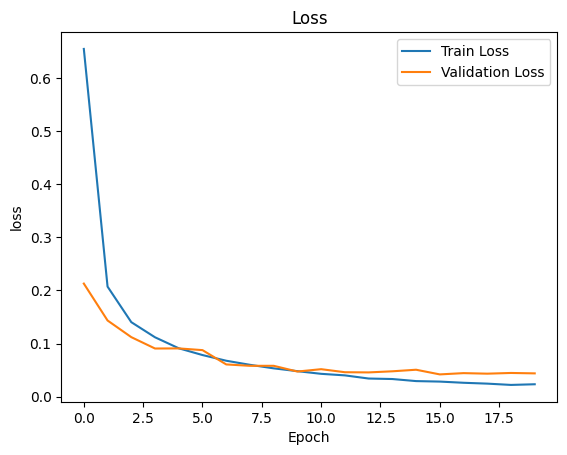

In [41]:
plt.plot(callback2.history['loss'], label='Train Loss')
plt.plot(callback2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

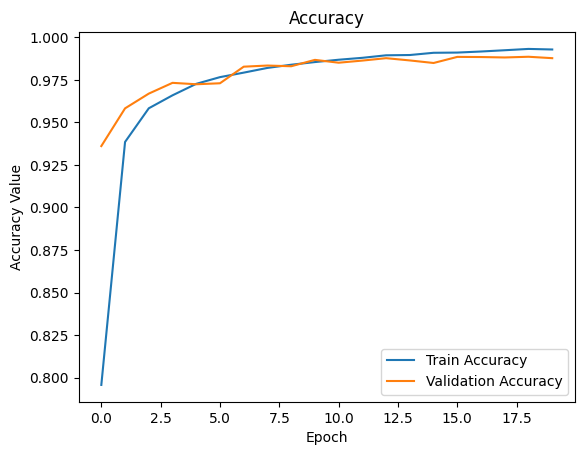

In [42]:
plt.plot(callback2.history['accuracy'],label='Train Accuracy')
plt.plot(callback2.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

1/1 [==============================] - 1s 635ms/step


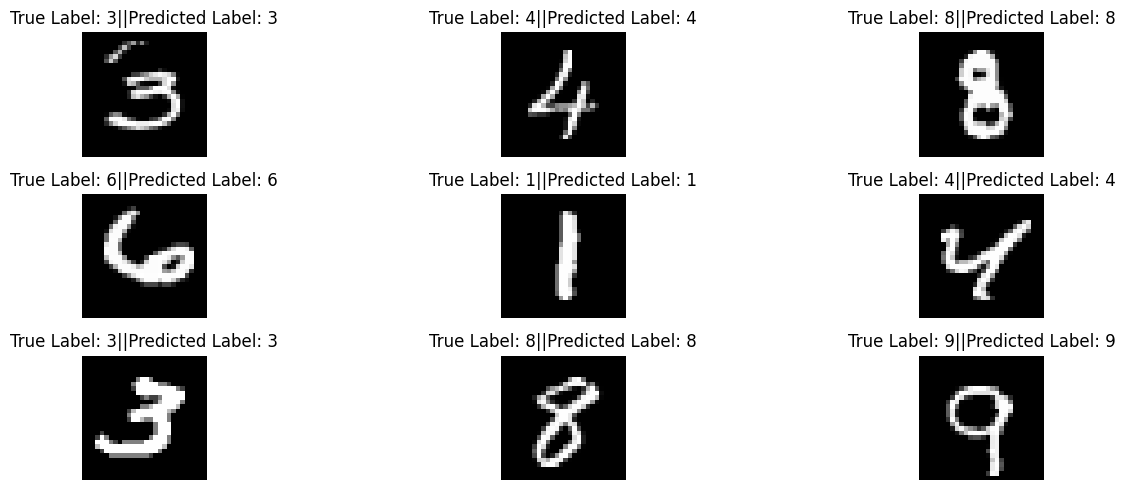

In [44]:
# Plot the Input, True Label, and Predicted Label
# Choose some test samples
num_samples = 9
samples_indices = np.random.choice(len(X_test), size=num_samples, replace=False)
samples = X_test[samples_indices]
true_labels = y_test[samples_indices]

# Predict the classes
predicted_labels = model2.predict(samples)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Plot the samples with true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(3, 3,i+1)
    plt.imshow(samples[i], cmap='gray')
    plt.title("True Label: " + str(true_labels[i])+"||"+"Predicted Label: " + str(predicted_labels[i]))
    plt.axis('off')



plt.tight_layout()
plt.show()

## Change the number of cells to  48,96,256  and report the accuracy curve

In [49]:
def LSTM_RNN(units):
  inputs = Input((28,28))
  x = Rescaling(scale=1/255.)(inputs)
  x = LSTM(units,recurrent_dropout=0.15)(x)
  outputs=Dense(10,'softmax')(x)
  model = keras.Model(inputs,outputs)
  model.summary()
  return model

In [60]:
def compile_fit(model):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  callback = model.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))
  return callback

In [55]:
def loss_accuracy_plot(callback):
  plt.plot(callback.history['loss'], label='Train Loss')
  plt.plot(callback.history['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  plt.plot(callback.history['accuracy'],label='Train Accuracy')
  plt.plot(callback.history['val_accuracy'],label='Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy Value')
  plt.legend()
  plt.show()

In [56]:
def input_label_plot(model,num_samples = 9) :
  # Plot the Input, True Label, and Predicted Label
  # Choose some test samples
  num_samples = 9
  samples_indices = np.random.choice(len(X_test), size=num_samples, replace=False)
  samples = X_test[samples_indices]
  true_labels = y_test[samples_indices]

  # Predict the classes
  predicted_labels = model.predict(samples)
  predicted_labels = np.argmax(predicted_labels, axis=1)

  # Plot the samples with true and predicted labels
  plt.figure(figsize=(15, 5))
  for i in range(num_samples):
      plt.subplot(3, 3,i+1)
      plt.imshow(samples[i], cmap='gray')
      plt.title("True Label: " + str(true_labels[i])+"||"+"Predicted Label: " + str(predicted_labels[i]))
      plt.axis('off')



  plt.tight_layout()
  plt.show()

## the number of cells = 48

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 rescaling_11 (Rescaling)    (None, 28, 28)            0         
                                                                 
 lstm_17 (LSTM)              (None, 48)                14784     
                                                                 
 dense_7 (Dense)             (None, 10)                490       
                                                                 
Total params: 15274 (59.66 KB)
Trainable params: 15274 (59.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 25s 30ms/step - loss: 0.7430 - accuracy: 0.7601 - val_loss: 0.2748 - val_accuracy: 0.9177
Epoch 2/20


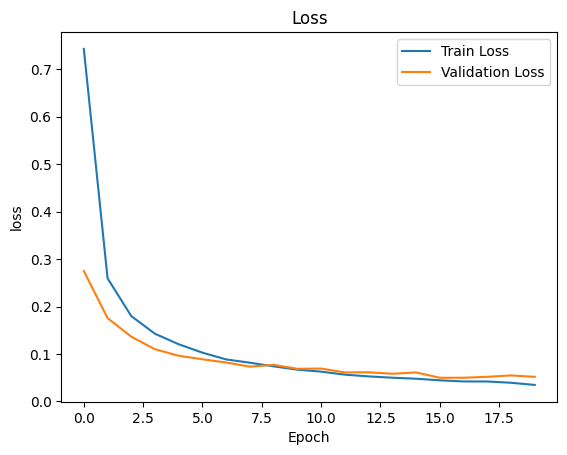

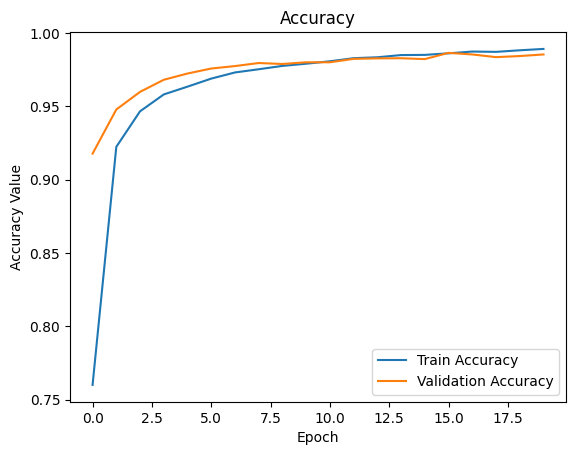

1/1 [==============================] - 0s 365ms/step


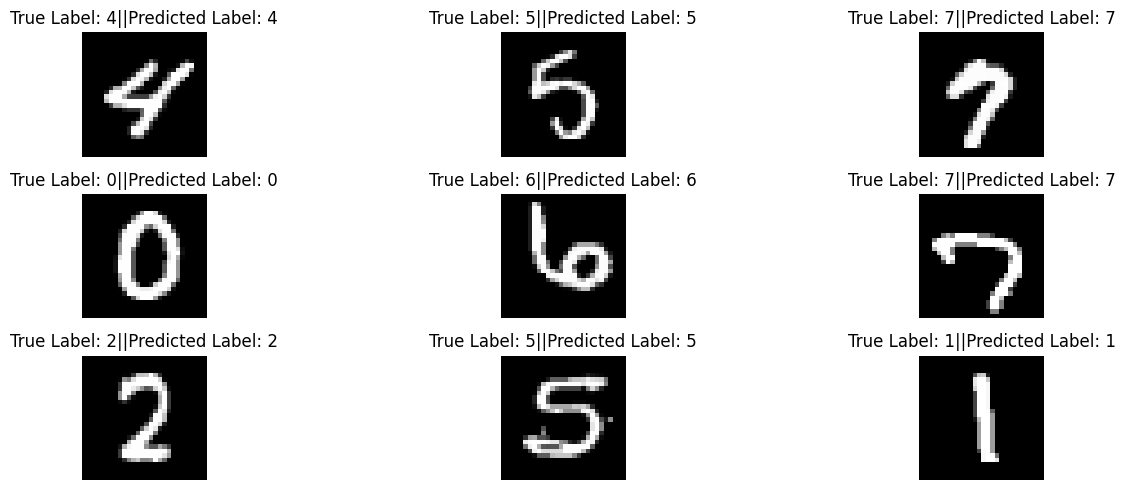

In [57]:
model3 = LSTM_RNN(48)
callback3 = compile_fit(model3)
loss_accuracy_plot(callback3)
input_label_plot(model3,num_samples = 9)

## the number of cells = 96

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 rescaling_12 (Rescaling)    (None, 28, 28)            0         
                                                                 
 lstm_18 (LSTM)              (None, 96)                48000     
                                                                 
 dense_8 (Dense)             (None, 10)                970       
                                                                 
Total params: 48970 (191.29 KB)
Trainable params: 48970 (191.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 42s 54ms/step - loss: 0.5386 - accuracy: 0.8252 - val_loss: 0.1872 - val_accuracy: 0.9462
Epoch 2/2

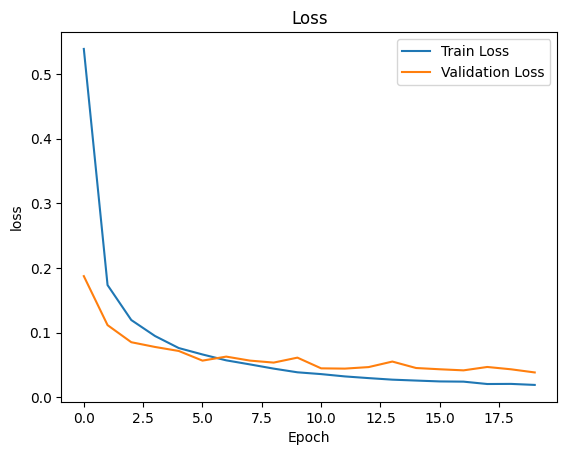

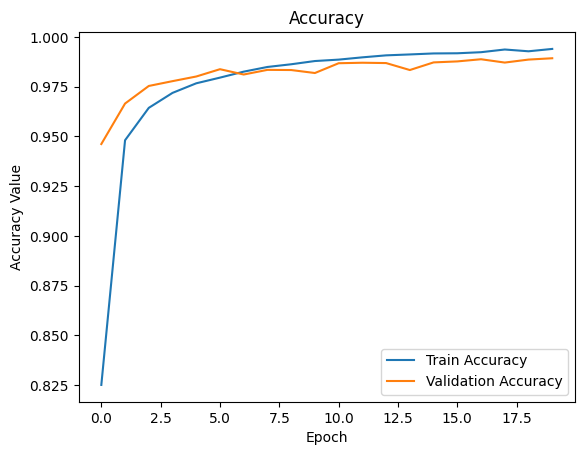

1/1 [==============================] - 0s 466ms/step


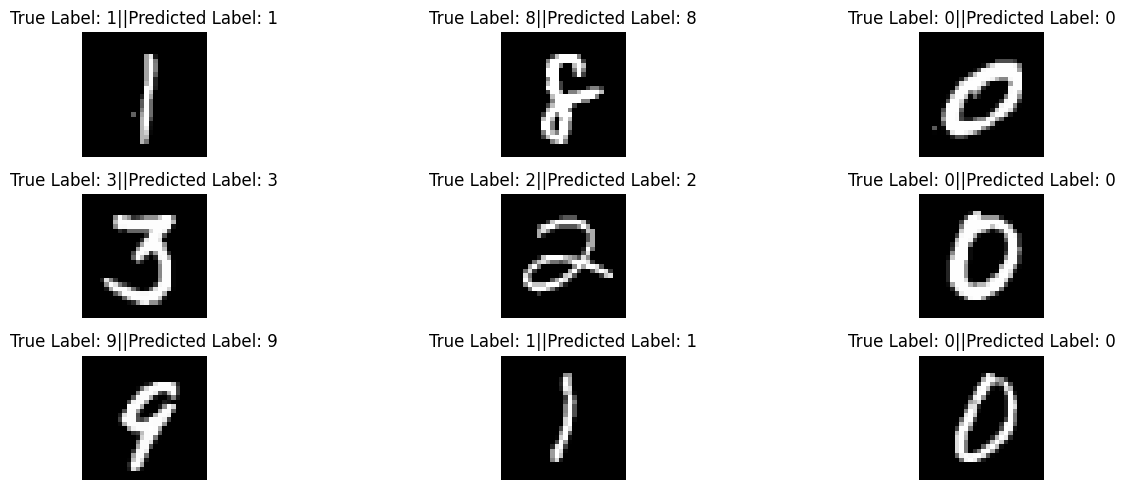

In [58]:
model4 = LSTM_RNN(96)
callback4 = compile_fit(model4)
loss_accuracy_plot(callback4)
input_label_plot(model4,num_samples = 9)

## the number of cells = 256

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 rescaling_14 (Rescaling)    (None, 28, 28)            0         
                                                                 
 lstm_20 (LSTM)              (None, 256)               291840    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 294410 (1.12 MB)
Trainable params: 294410 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/9
750/750 [==============================] - 204s 269ms/step - loss: 0.4239 - accuracy: 0.8629 - val_loss: 0.1443 - val_accuracy: 0.9542
Epoch 2/9

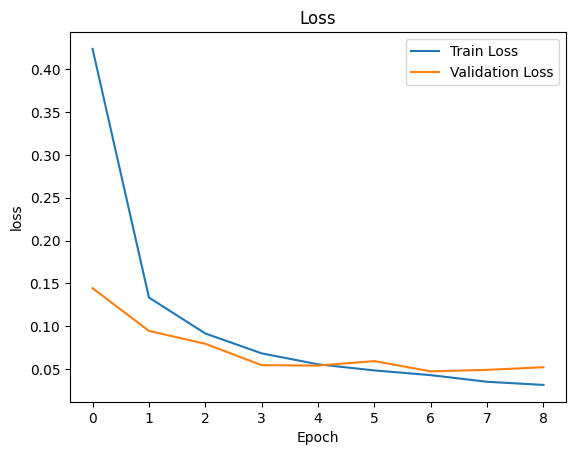

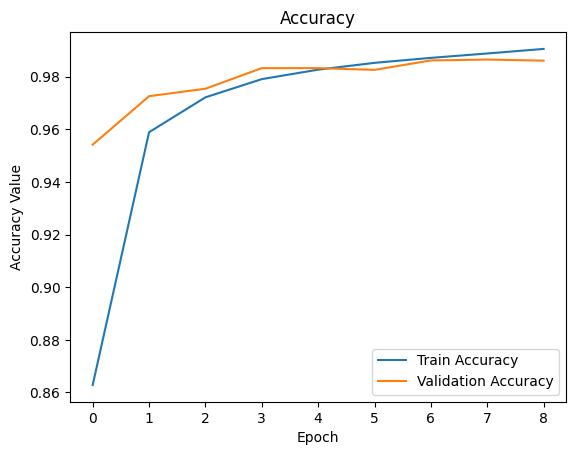

1/1 [==============================] - 0s 421ms/step


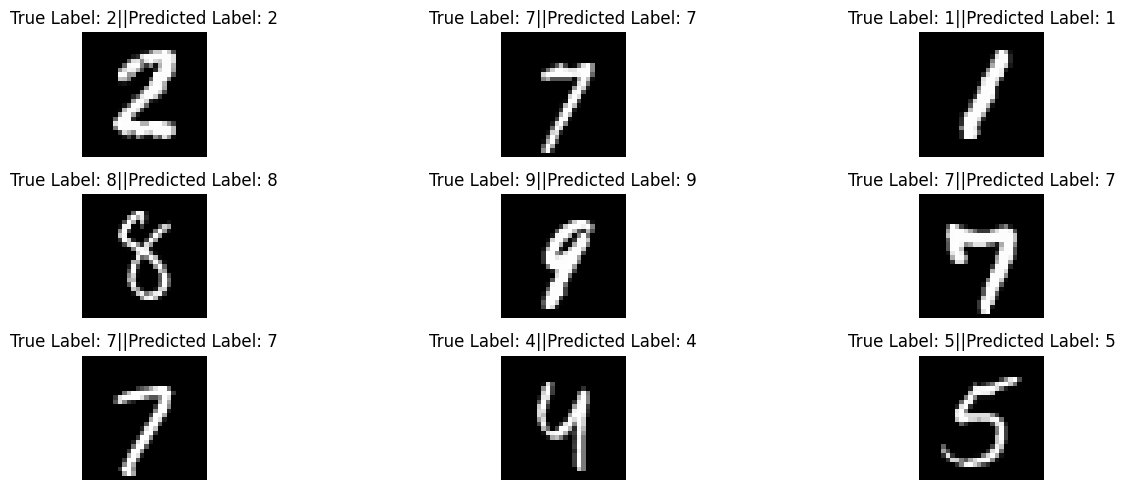

In [61]:
model5 = LSTM_RNN(256)
callback5 = compile_fit(model5)
loss_accuracy_plot(callback5)
input_label_plot(model5,num_samples = 9)

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

## **i)** Model Design

In [71]:
# Define the ConvLSTM1D model
def build_ConvLSTM1D_model(kernel_size, padding):
    inputs = Input(shape=(28, 28))
    x = Rescaling(scale=1.0 / 255)(inputs)
    x = Reshape((28, 28, 1))(x)  # Reshape for ConvLSTM1D
    x = ConvLSTM1D(filters=32, kernel_size=kernel_size, padding=padding)(x)
    x = Flatten()(x)  # Flatten the output sequence
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



*    Kernel Size =  1
*   Padding = same




In [72]:
model6 = build_ConvLSTM1D_model(kernel_size=1, padding='same')

## **ii)** Model Training

In [73]:
callback6 = model6.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 135s 176ms/step - loss: 0.5528 - accuracy: 0.8222 - val_loss: 0.2452 - val_accuracy: 0.9216
Epoch 2/20
750/750 [==============================] - 134s 179ms/step - loss: 0.2006 - accuracy: 0.9362 - val_loss: 0.1525 - val_accuracy: 0.9523
Epoch 3/20
750/750 [==============================] - 133s 177ms/step - loss: 0.1336 - accuracy: 0.9576 - val_loss: 0.1290 - val_accuracy: 0.9593
Epoch 4/20
750/750 [==============================] - 131s 175ms/step - loss: 0.1008 - accuracy: 0.9677 - val_loss: 0.1110 - val_accuracy: 0.9652
Epoch 5/20
750/750 [==============================] - 132s 176ms/step - loss: 0.0823 - accuracy: 0.9730 - val_loss: 0.1198 - val_accuracy: 0.9637
Epoch 6/20
750/750 [==============================] - 141s 188ms/step - loss: 0.0694 - accuracy: 0.9773 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 7/20
750/750 [==============================] - 138s 184ms/step - loss: 0.0577 - accuracy: 0.9814 - val_loss: 0.0943 -

## **iii)** Model Evaluation

In [74]:
train_evaluation = model6.evaluate(X_train,y_train)
print("Train Evaluation Loss: {:.2f}%".format(train_evaluation[0]*100))
print("Train Evaluation Accuracy: {:.2f}%".format(train_evaluation[1]*100))

1500/1500 [==============================] - 32s 21ms/step - loss: 0.0174 - accuracy: 0.9935
Train Evaluation Loss: 1.74%
Train Evaluation Accuracy: 99.35%


In [75]:
val_evaluation = model6.evaluate(x_val,y_val)
print("Validation Evaluation Loss: {:.2f}%".format(val_evaluation[0]*100))
print("validation Evaluation Accuracy: {:.2f}%".format(val_evaluation[1]*100))

375/375 [==============================] - 9s 23ms/step - loss: 0.1217 - accuracy: 0.9751
Validation Evaluation Loss: 12.17%
validation Evaluation Accuracy: 97.51%


In [76]:
test_evaluation = model6.evaluate(X_test,y_test)
print("Test Evaluation Loss: {:.2f}%".format(test_evaluation[0]*100))
print("Test Evaluation Accuracy: {:.2f}%".format(test_evaluation[1]*100))

313/313 [==============================] - 6s 20ms/step - loss: 0.1126 - accuracy: 0.9731
Test Evaluation Loss: 11.26%
Test Evaluation Accuracy: 97.31%


## **iv)** Result Visualization

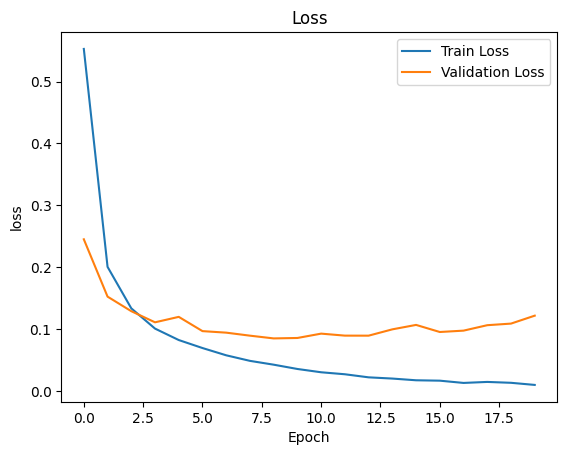

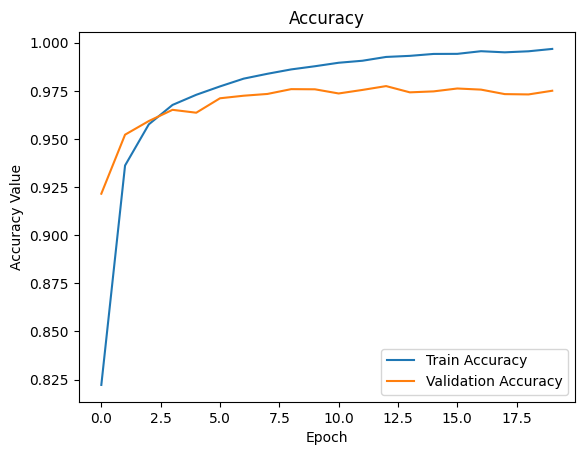

In [77]:
loss_accuracy_plot(callback6)

## **v)** Let's Visualize Model Predictions

1/1 [==============================] - 0s 412ms/step


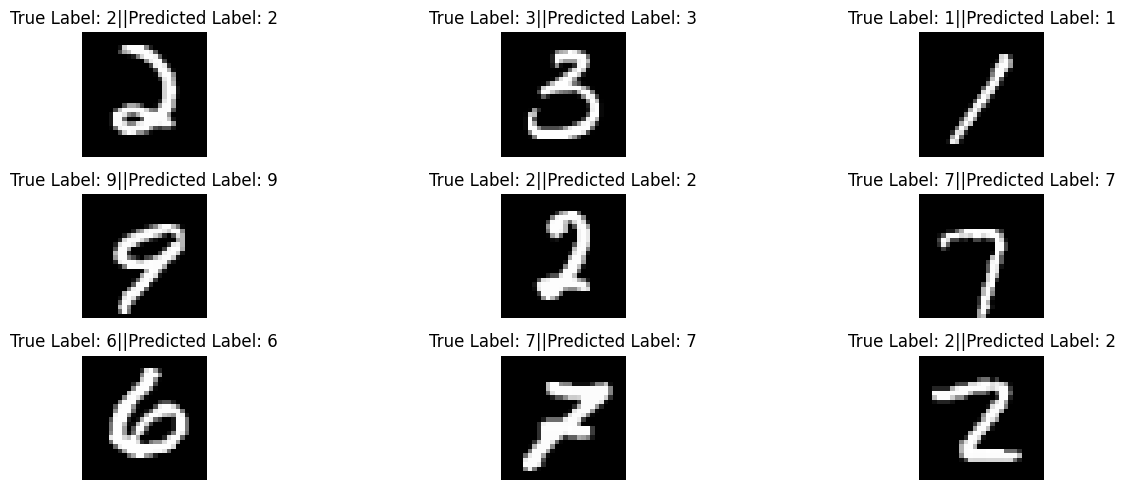

In [78]:
input_label_plot(model6,num_samples = 9)



*   Kernel Size = 3
*   Padding =  valid

In [79]:
model7 = build_ConvLSTM1D_model(kernel_size=3, padding='valid')

## **ii)** Model Training

In [80]:
callback7 = model7.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 226s 298ms/step - loss: 0.3767 - accuracy: 0.8765 - val_loss: 0.1362 - val_accuracy: 0.9581
Epoch 2/20
750/750 [==============================] - 215s 286ms/step - loss: 0.1209 - accuracy: 0.9616 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 3/20
750/750 [==============================] - 213s 285ms/step - loss: 0.0861 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 4/20
750/750 [==============================] - 215s 287ms/step - loss: 0.0663 - accuracy: 0.9785 - val_loss: 0.0690 - val_accuracy: 0.9799
Epoch 5/20
750/750 [==============================] - 228s 305ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.0660 - val_accuracy: 0.9794
Epoch 6/20
750/750 [==============================] - 223s 298ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0644 - val_accuracy: 0.9823
Epoch 7/20
750/750 [==============================] - 220s 293ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0576 -

## **iii)** Model Evaluation

In [81]:
train_evaluation = model7.evaluate(X_train,y_train)
print("Train Evaluation Loss: {:.2f}%".format(train_evaluation[0]*100))
print("Train Evaluation Accuracy: {:.2f}%".format(train_evaluation[1]*100))

1500/1500 [==============================] - 64s 43ms/step - loss: 0.0057 - accuracy: 0.9980
Train Evaluation Loss: 0.57%
Train Evaluation Accuracy: 99.80%


In [82]:
val_evaluation = model7.evaluate(x_val,y_val)
print("Validation Evaluation Loss: {:.2f}%".format(val_evaluation[0]*100))
print("validation Evaluation Accuracy: {:.2f}%".format(val_evaluation[1]*100))

375/375 [==============================] - 16s 42ms/step - loss: 0.0610 - accuracy: 0.9852
Validation Evaluation Loss: 6.10%
validation Evaluation Accuracy: 98.52%


In [83]:
test_evaluation = model7.evaluate(X_test,y_test)
print("Test Evaluation Loss: {:.2f}%".format(test_evaluation[0]*100))
print("Test Evaluation Accuracy: {:.2f}%".format(test_evaluation[1]*100))

313/313 [==============================] - 13s 43ms/step - loss: 0.0580 - accuracy: 0.9847
Test Evaluation Loss: 5.80%
Test Evaluation Accuracy: 98.47%


## **iv)** Result Visualization

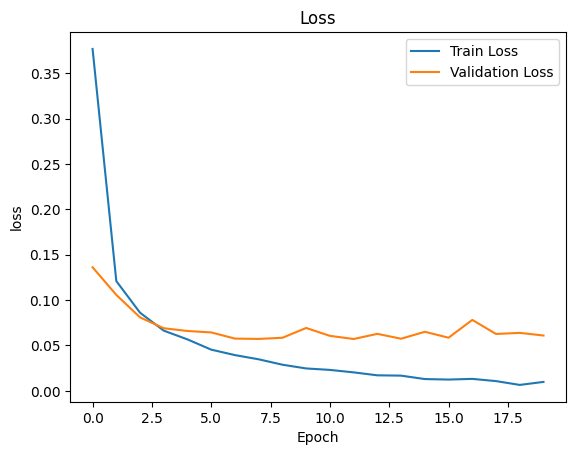

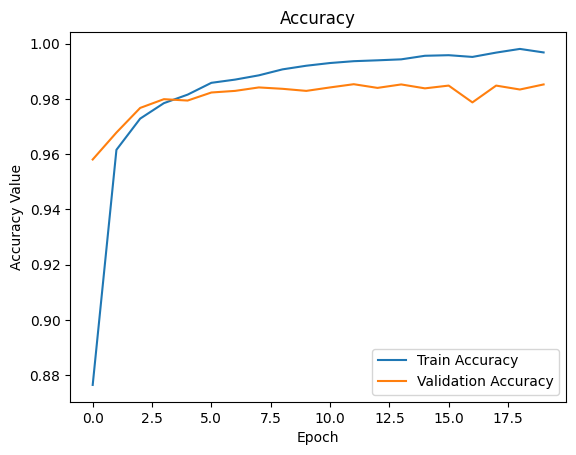

In [84]:
loss_accuracy_plot(callback7)

## **v)** Let's Visualize Model Predictions

1/1 [==============================] - 0s 368ms/step


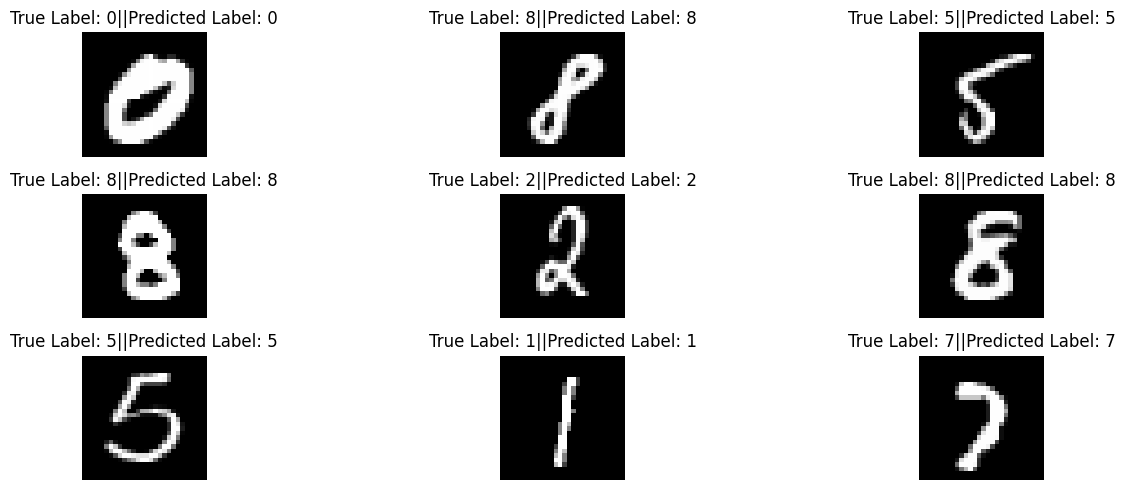

In [85]:
input_label_plot(model7,num_samples = 9)

Kernel Size = 3 & Padding = valid better than Kernel Size = 1 & Padding = same

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$